In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
id = train.pop('id')
y = train.pop('species')
y =LabelEncoder().fit(y).transform(y)


In [4]:
X = StandardScaler().fit(train).transform(train)

In [5]:
y = to_categorical(y)


In [6]:
model = Sequential()
model.add(Dense(1024,input_dim=192))
model.add(Dropout(0.2))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('sigmoid'))
model.add(Dense(99))
model.add(Activation('softmax'))

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')

In [8]:
history = model.fit(X,y,batch_size =128, nb_epoch = 100, verbose=1)

Epoch 1/100
990/990 [==============================] - 0s - loss: 4.7709     
Epoch 2/100
990/990 [==============================] - 0s - loss: 4.3240     
Epoch 3/100
990/990 [==============================] - 0s - loss: 4.0269     
Epoch 4/100
990/990 [==============================] - 0s - loss: 3.7085     
Epoch 5/100
990/990 [==============================] - 0s - loss: 3.4071     
Epoch 6/100
990/990 [==============================] - 0s - loss: 3.1174     
Epoch 7/100
990/990 [==============================] - 0s - loss: 2.8300     
Epoch 8/100
990/990 [==============================] - 0s - loss: 2.5924     
Epoch 9/100
990/990 [==============================] - 0s - loss: 2.3485     
Epoch 10/100
990/990 [==============================] - 0s - loss: 2.1126     
Epoch 11/100
990/990 [==============================] - 0s - loss: 1.8942     
Epoch 12/100
990/990 [==============================] - 0s - loss: 1.6828     
Epoch 13/100
990/990 [==============================] - 0s - 

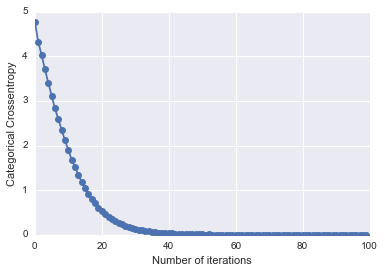

In [9]:
from pylab import rcParams
rcParams['figure.figsize']=10,10

%matplotlib inline
plt.plot(history.history['loss'], 'o-')
plt.xlabel('Number of iterations')
plt.ylabel('Categorical Crossentropy')

In [10]:
index = test.pop('id')
test = StandardScaler().fit_transform(test)
yPred = model.predict_proba(test)


594/594 [==============================] - 0s     


In [11]:
train1 = pd.read_csv('train.csv')
yPred = pd.DataFrame(yPred,index = index, columns = sorted(train1.species.unique()))

In [12]:
yPred.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,7.693728e-14,2.421002e-15,1.860142e-19,8.210993e-12,1.092040e-13,3.631284e-12,8.302049e-19,1.070615e-15,9.029632e-15,1.681613e-13,...,2.403225e-15,1.319722e-13,5.499548e-15,3.616856e-17,5.066093e-15,7.221960e-16,1.033657e-17,7.938547e-17,4.047996e-11,5.304998e-19
7,5.275865e-16,1.062001e-13,1.849125e-13,2.055048e-10,4.178393e-17,4.246650e-12,1.985428e-12,1.425273e-14,7.238676e-16,2.015092e-14,...,2.010544e-13,1.850281e-15,1.418356e-15,1.683013e-19,3.387815e-21,1.117845e-11,2.920784e-14,5.756631e-12,4.366846e-15,4.007426e-15
9,3.495142e-13,9.999998e-01,1.657906e-12,3.415214e-16,1.861747e-07,2.315573e-10,4.426538e-14,3.091534e-12,3.726860e-09,1.018472e-09,...,4.334668e-13,2.203884e-16,4.680700e-14,4.566718e-15,2.305770e-15,1.115020e-13,4.664034e-11,1.906538e-17,1.047279e-15,4.977681e-09
12,2.323256e-12,1.573313e-03,4.267835e-09,4.466058e-11,3.336168e-11,5.014669e-12,7.325495e-06,2.404683e-09,1.910187e-07,6.391972e-09,...,3.290674e-10,6.555670e-13,2.922514e-09,1.220311e-12,8.432885e-12,1.702643e-06,1.769647e-04,3.299196e-10,6.433533e-13,2.257440e-05
13,1.134243e-14,6.023561e-12,2.579393e-18,1.128704e-17,3.517814e-14,1.840741e-16,1.840130e-12,5.054283e-14,4.286385e-09,4.632485e-13,...,3.543055e-12,1.943623e-17,2.805131e-11,6.989069e-15,8.133604e-12,4.412466e-12,1.475574e-08,6.835898e-15,9.399320e-14,7.156448e-15


In [13]:
yPred.shape

(594, 99)

In [14]:
yPred.to_csv('NN_submission.csv')